In [2]:
# import necessary packages

import imageio
import scipy.ndimage as ndi
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [23]:
# the path of a T1-weighted brain .nii image
path = "data/BRAIN.nii"


# read the .nii image containing the volume with the SimpleITK 
sitk_f = sitk.ReadImage(path)

# access to the numpy array
slices = sitk.GetArrayFromImage(sitk_f)
print("[INFOS] 2D Array slice data type :", type(slices)) #-> numpy array
print("[INFOS] 3D sitk object type      :", type(sitk_f)) #-> numpy array
print("[INFOS] Shape of 3D image array  :", slices.shape)
print("[INFOS] Shape of 2D slice array  :", slices[0].shape)
print("[INFOS] Number of slices         :", slices.shape[0])

[INFOS] 2D Array slice data type : <class 'numpy.ndarray'>
[INFOS] 3D sitk object type      : <class 'SimpleITK.SimpleITK.Image'>
[INFOS] Shape of 3D image array  : (166, 256, 256)
[INFOS] Shape of 2D slice array  : (256, 256)
[INFOS] Number of slices         : 166


(-0.5, 255.5, 255.5, -0.5)

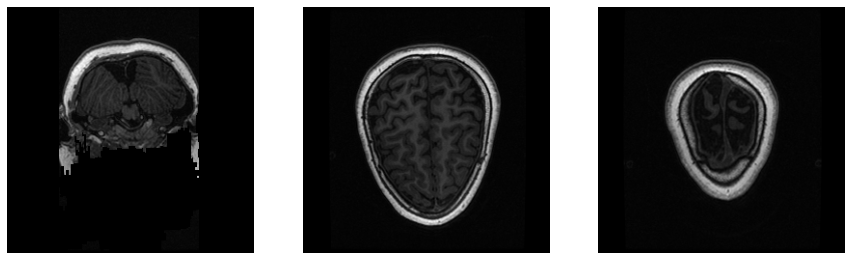

In [17]:
fig, ax = plt.subplots(1,3, figsize=(15,10))

# draw the image in grayscale
ax[0].imshow(slices[20], cmap='gray')
ax[1].imshow(slices[120], cmap='gray')
ax[2].imshow(slices[140], cmap='gray')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

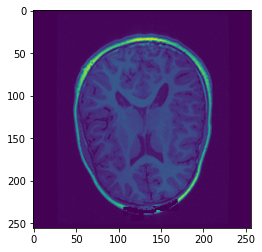

In [60]:
def removeKeymapConflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list: 
                keys.remove(key)

def viewer3D(volume):
    removeKeymapConflicts({'n', 'l'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', processKey)

def processKey(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'n':
        lSlice(ax)
    elif event.key == 'l':
        nSlice(ax)
    fig.canvas.draw()

def lSlice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def nSlice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

viewer3D(t1)
plt.show()


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 166)
affine: 
[[  -0.9375        0.            0.          124.61199951]
 [   0.            0.9375        0.         -105.82050323]
 [   0.            0.            1.          -71.32540131]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 166   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.      0.9375  0.9375  1.      0.      1.      1.      1.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_du

In [62]:
image_data = data.get_fdata()
print(image_data.shape) # 166 numbers of slices

(256, 256, 166)


In [67]:

# RESULTS USING NIBABEL FUNCTIONS
print("")
print("[INFOS] Data affine     :", data.affine)
print("[INFOS] Data            :", type(data))
print("[INFOS] Image data type :", type(image_data))
print("[INFOS] Image data      :", image_data.dtype)
print("[INFOS] Image shaoe      :", image_data.shape)

# RESULTS USING SITK READ FUNCTIONS
print("")
print("[INFOS] Image data type       :", type(t1)) #-> numpy array
print("[INFOS] Shape of image array  :",t1.shape)
print("[INFOS] Number of slice       :", t1.shape[0])
print("[INFOS] Len of stick          :",len(sitk_f))
print("")


[INFOS] Data affine     : [[  -0.9375        0.            0.          124.61199951]
 [   0.            0.9375        0.         -105.82050323]
 [   0.            0.            1.          -71.32540131]
 [   0.            0.            0.            1.        ]]
[INFOS] Data            : <class 'nibabel.nifti1.Nifti1Image'>
[INFOS] Image data type : <class 'numpy.memmap'>
[INFOS] Image data      : float64
[INFOS] Image shaoe      : (256, 256, 166)

[INFOS] Image data type       : <class 'numpy.ndarray'>
[INFOS] Shape of image array  : (166, 256, 256)
[INFOS] Number of slice       : 166
[INFOS] Len of stick          : 10878976



In [68]:
print(data.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 166   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.      0.9375  0.9375  1.      0.      1.      1.      1.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer Dec  2 2008'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 124.612
qoffset_y       : -105.8205
qoffse

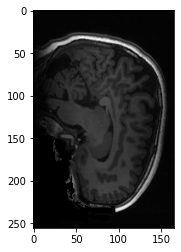

In [69]:
plt.imshow(image_data[120,:,:], cmap="gray")

In [70]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

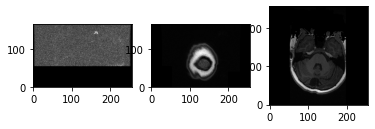

In [71]:
#we have a look at slices over the first, 
#second and third dimensions of the array.

slice_0 = image_data[34, :, :]
slice_1 = image_data[:, 35, :]
slice_2 = image_data[:, :, 36]
show_slices([slice_0, slice_1, slice_2])
#plt.suptitle("Center slices for EPI image")

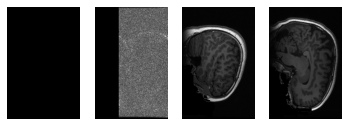

In [72]:
#------------------------------------------------------------------------------------------
#(Slice 3D images)
#------------------------------------------------------------------------------------------
# Plot the images on a subplots array 

fig, axes = plt.subplots(nrows=1, ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = image_data[ii * 40]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')

# Render the figure
plt.show()

Data type: float64
Min. value: 0.0
Max value: 10106.0


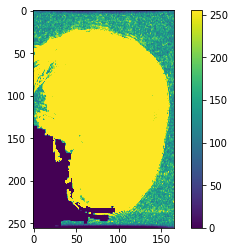

In [111]:
#------------------------------------------------------------------------------------------
#Load one slice and show the necessary informations
#------------------------------------------------------------------------------------------

print('Data type:', image_data.dtype)
print('Min. value:', image_data.min())
print('Max value:', image_data.max())

# Plot the grayscale image
plt.imshow(im, vmin=0, vmax=255)
plt.colorbar()

Num. Labels: 3


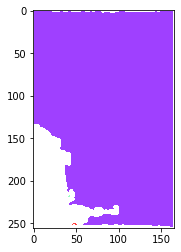

In [74]:
# Smooth intensity values
im_filt = ndi.median_filter(image_data[132], size=3)

# Select high-intensity pixels
mask_start = np.where(im_filt > 60, 1, 0)
mask = ndi.binary_closing(mask_start)

# Label the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Num. Labels:', nlabels)

##
# Create a `labels` overlay
overlay = np.where(labels > 0, labels, np.nan)

# Use imshow to plot the overlay
plt.imshow(overlay, cmap='rainbow', alpha=0.75)

In [94]:
# the maxim voxel intensity 
print('[INFOS] The maximum voxel intensity is {}'.format(t1.max()))
print('[INFOS] The mean voxel intensity is {}'.format(t1.mean()))
print('[INFOS] The minium voxel intensity is {}'.format(t1.min()))

[INFOS] The maximum voxel intensity is 10106
[INFOS] The mean voxel intensity is 535.6465138814535
[INFOS] The minium voxel intensity is 0


In [104]:
"""
The image datatype determines the range of possible intensities: e.g., 8-bit unsigned integers (uint8) 
can take values in the range of 0 to 255. 
A colorbar can be helpful for connecting these values to the visualized image.
"""
print('[INFOS] image data type {}'.format(t1[1].dtype)) # int16
print('[INFOS] image data type {}'.format(t1.dtype))

# convert int16 to uint8
im3d = np.uint8(t1)

print('[INFOS] image data type {}'.format(im3d[1].dtype)) # int16
print('[INFOS] image data type {}'.format(im3d.dtype))

[INFOS] image data type int16
[INFOS] image data type int16
[INFOS] image data type uint8
[INFOS] image data type uint8


[3718316  104550  677110 1721773 1098785  311981  102069   61227   54179
   49792   48528   45240   44067   41944   42299   41429   42311   41803
   43337   43252   46869   48768   53143   59360   62640   69327   71734
   76926   76930   80136   78398   79378   76079   75777   70891   70207
   65154   62919   58897   57807   53324   51791   48029   45615   44336
   40822   40728   39108   41237   41263   43694   43264   42728   38763
   35256   29851   26432   22583   20301   16866   14859   12403   11060
    9110    7862    7054    5944    5707    5205    5192    5025    5013
    4973    4870    4671    4942    4739    4747    4620    4817    4619
    4836    4565    4707    4404    4321    4475    4403    4473    4336
    4356    4260    4264    4152    4089    4067    4090    4003    3909
    3885    3798    3648    3753    3648    3608    3547    3411    3601
    3449    3518    3425    3530    3333    3345    3347    3390    3321
    3337    3232    3356    3217    3304    3232   

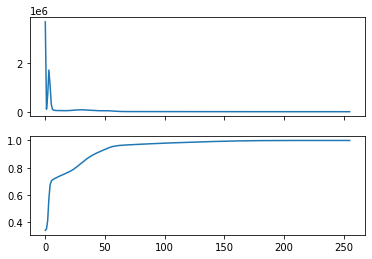

In [106]:
# Create a histogram, binned at each possible value
hist = ndi.measurements.histogram(t1, min=0, max=10106, bins=256)
#hist = ndi.measurements.histogram(t1, min=0, max=10106, bins=256)
# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# histograme for the in16 data type
# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
#plt.plot(hist, label='Histogram')
print(hist)

[3655240   15292   14951   15246   15162   15189   15122   15184   15118
   15131   15046   15193   15091   15219   15067   15047   15384   15167
   15129   15239   15572   15619   15306   15620   15279   15325   15501
   15497   15715   15709   15871   16018   15797   15949   15926   15774
   16079   16089   15888   15891   15787   15898   15928   15720   15574
   15621   15400   15131   15570   15267   15185   15010   15202   14943
   15198   14945   14972   15003   14996   14971   14840   14937   15239
   15013   15138   15040   15368   15288   15358   15543   15669   15591
   15909   16212   16060   16372   16236   16757   17019   17237   17268
   17727   18094   18460   18658   19177   19643   20103   20478   21095
   21563   22268   22723   23618   24696   25083   25477   26436   27099
   28000   29035   29969   30853   31885   33213   33879   34834   35693
   36749   37782   38644   40043   40758   42079   43634   44557   45450
   46770   46986   48413   49216   50237   50849   

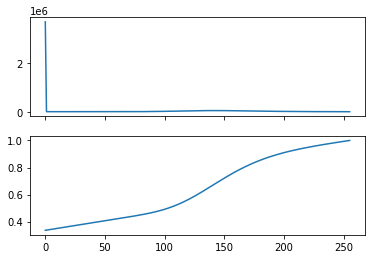

In [110]:
# Create a histogram, binned at each possible value
hist1 = ndi.measurements.histogram(im3d, min=0, max=255, bins=256)
#hist = ndi.measurements.histogram(t1, min=0, max=10106, bins=256)
# Create a cumulative distribution function
cdf1 = hist1.cumsum() / hist1.sum()

# histograme for the in16 data type
# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist1, label='Histogram')
axes[1].plot(cdf1, label='CDF')
#plt.plot(hist, label='Histogram')
print(hist1)

In [112]:
# affichage for im3d the one converted 
print('Data type:', im3d.dtype)
print('Min. value:', im3d.min())
print('Max value:', im3d.max())

Data type: uint8
Min. value: 0
Max value: 255


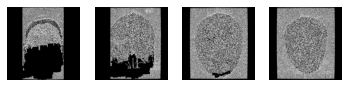

In [113]:
#------------------------------------------------------------------------------------------
#(Slice 3D images)
#------------------------------------------------------------------------------------------
# Plot the images on a subplots array 

fig, axes = plt.subplots(nrows=1, ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = im3d[ii * 40]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')

# Render the figure
plt.show()

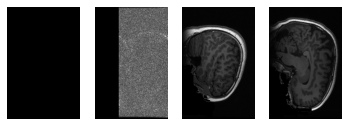

In [114]:
#------------------------------------------------------------------------------------------
#(Slice 3D images)
#------------------------------------------------------------------------------------------
# Plot the images on a subplots array 

fig, axes = plt.subplots(nrows=1, ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = image_data[ii * 40]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')

# Render the figure
plt.show()

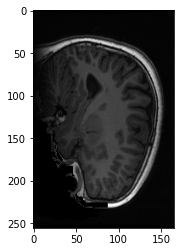

In [118]:
plt.imshow(image_data[160], cmap="gray")

In [2]:
# Screen out non-bone pixels from "im"
mask_brain > 900
#mask_brain = image_data <= 900
#im_brain = np.where(mask_brain, image_data, 0)
#plt.imshow(im_brain[160], cmap="gray")

NameError: name 'mask_brain' is not defined

In [3]:
plt.imshow(mask_brain[160], cmap="gray")

NameError: name 'plt' is not defined

In [164]:
#https://goodboychan.github.io/chans_jupyter/python/datacamp/vision/2020/08/15/01-Masks-and-Filters-in-Biomedical-Image-Analysis.html

[6047134    1329    1187    1274    1288    1255    1268    1385    1390
    1427    1432    1462    1525    1501    1565    1618    1700    1692
    1711    1765    1820    1894    1916    2018    2095    2178    2196
    2377    2419    2529    2599    2651    2774    2802    2860    2841
    2896    2953    2816    2887    2759    2854    2717    2711    2531
    2654    2494    2389    2409    2449    2351    2282    2233    2227
    2236    2180    2212    2135    2160    2183    2230    2225    2338
    2346    2368    2414    2578    2558    2649    2887    2949    3004
    3098    3369    3454    3625    3805    4071    4416    4504    4708
    5230    5379    5884    6249    6611    7006    7521    7994    8595
    8972    9660   10191   10992   11928   12408   12985   13887   14779
   15533   16579   17562   18415   19278   20555   21334   22560   23384
   24359   25282   26255   27661   28388   29602   31077   32087   32994
   34177   34545   35971   36877   37854   38586   

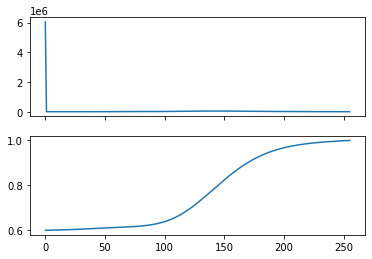

In [165]:
#Min. value: 0.0
#Max value: 10106.0

# Create a histogram, binned at each possible value
hist1 = ndi.measurements.histogram(im_brain, min=0, max=255, bins=256)
#hist = ndi.measurements.histogram(t1, min=0, max=10106, bins=256)
# Create a cumulative distribution function
cdf1 = hist1.cumsum() / hist1.sum()

# histograme for the in16 data type
# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist1, label='Histogram')
axes[1].plot(cdf1, label='CDF')
#plt.plot(hist, label='Histogram')
print(hist1)

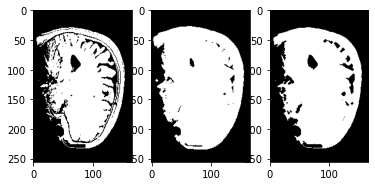

In [172]:
mask_bone = image_data >= 900
mask_dilate = ndi.binary_dilation(mask_bone, iterations=2)
mask_closed = ndi.binary_closing(mask_bone, iterations=2)

# Plot masked images
fig, axes = plt.subplots(1, 3)
axes[0].imshow(mask_bone[160], cmap='gray')
axes[1].imshow(mask_dilate[160], cmap='gray')
axes[2].imshow(mask_closed[160], cmap='gray')